## Notebook for Creating Videos from the Split Cell Images

Copyright by Arjun Sarkar

*Research Group Applied Systems Biology - Head: Prof. Dr. Marc Thilo Figge  
https://www.leibniz-hki.de/en/applied-systems-biology.html  
HKI-Center for Systems Biology of Infection  
Leibniz Institute for Natural Product Research and Infection Biology -  
Hans Knöll Insitute (HKI)  
Adolf-Reichwein-Straße 23, 07745 Jena, Germany*

This Notebook creates videos (each of 100 frames) from the split cell images.  
1. Using the csv files from each donor we select cell tracks with a minimum of 100 frames  
2. These cells are joined together to form the video  
3. Finally, the videos which are not 100 frames are removed  

### Code Blocks

In [1]:
# importing the libraries
import cv2 as cv
import re
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
path = '/asbdata/Arjun/Bloodi/Split_cells/' # path of split cell images
output_path = '/asbdata/Arjun/Bloodi/Split_40_Frames/' # path to store videos

folders = [1,2,3,4,5,6,13,14,15,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35]

ca = [1,4,13,18,21,24,27,30,33]
cg = [2,5,14,19,22,25,28,31,34]
mock = [3,6,15,20,23,26,29,32,35]

#### Taking Donor 3 as example and appling changes to the csv

In [3]:
# Reading the CSV file for Donor 3 into a DataFrame named 'df'
df = pd.read_csv('3.csv')

# Displaying the first few rows of the DataFrame
df.head()

,Folder,File,image_ID,time_ID
0,3,0000_t-0_ID-22.png,22,0
1,3,0001_t-1_ID-22.png,22,1
2,3,0002_t-2_ID-22.png,22,2
3,3,0003_t-3_ID-22.png,22,3
4,3,0004_t-4_ID-22.png,22,4


In [4]:
df = df.sort_values('image_ID') # sorting images
df

,Folder,File,image_ID,time_ID
11293,3,6183_t-82_ID-1.png,1,82
11307,3,6197_t-96_ID-1.png,1,96
11306,3,6196_t-95_ID-1.png,1,95
11305,3,6195_t-94_ID-1.png,1,94
11304,3,6194_t-93_ID-1.png,1,93
...,...,...,...,...
12651,3,7541_t-252_ID-168.png,168,252
6233,3,14758_t-251_ID-169.png,169,251
6232,3,14757_t-250_ID-169.png,169,250
6230,3,14755_t-248_ID-169.png,169,248


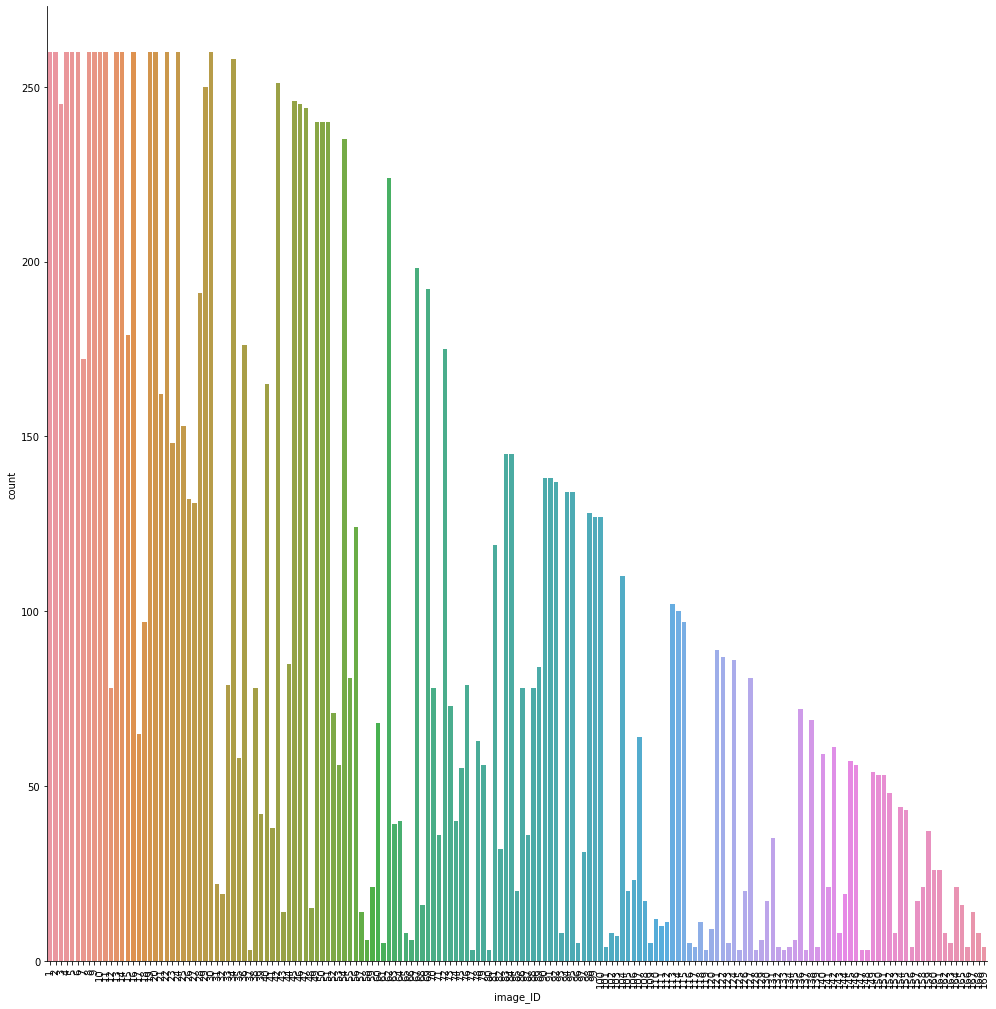

In [5]:
ax = sns.catplot(x='image_ID', data = df, kind = 'count',height=14, aspect = 1)
ax.set_xticklabels(rotation = 90)

# All cell tracks (max=260 tracks)
# x axis = cell id
# y_axis = number of cells in the cell id

In [6]:
# checking number of cell tracks for all ID's

counts = df['image_ID'].value_counts()
counts

1      260
20     260
22     260
24     260
16     260
      ... 
137      3
133      3
128      3
125      3
119      3
Name: image_ID, Length: 169, dtype: int64

In [7]:
counts_dict = counts.to_dict()          #converts to dictionary          
df['counts_ID'] = df['image_ID'].map(counts)
df

,Folder,File,image_ID,time_ID,counts_ID
11293,3,6183_t-82_ID-1.png,1,82,260
11307,3,6197_t-96_ID-1.png,1,96,260
11306,3,6196_t-95_ID-1.png,1,95,260
11305,3,6195_t-94_ID-1.png,1,94,260
11304,3,6194_t-93_ID-1.png,1,93,260
...,...,...,...,...,...
12651,3,7541_t-252_ID-168.png,168,252,8
6233,3,14758_t-251_ID-169.png,169,251,4
6232,3,14757_t-250_ID-169.png,169,250,4
6230,3,14755_t-248_ID-169.png,169,248,4


In [8]:
df = df[df['counts_ID'] >= 100] # select only cell ids with a min of 100 frames
df

,Folder,File,image_ID,time_ID,counts_ID
11293,3,6183_t-82_ID-1.png,1,82,260
11307,3,6197_t-96_ID-1.png,1,96,260
11306,3,6196_t-95_ID-1.png,1,95,260
11305,3,6195_t-94_ID-1.png,1,94,260
11304,3,6194_t-93_ID-1.png,1,93,260
...,...,...,...,...,...
7527,3,2417_t-234_ID-114.png,114,234,100
7523,3,2413_t-230_ID-114.png,114,230,100
7524,3,2414_t-231_ID-114.png,114,231,100
7525,3,2415_t-232_ID-114.png,114,232,100


In [9]:
df['repeats'] = df['counts_ID']/100
df

/tmp/ipykernel_639354/3860497536.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['repeats'] = df['counts_ID']/100


,Folder,File,image_ID,time_ID,counts_ID,repeats
11293,3,6183_t-82_ID-1.png,1,82,260,2.6
11307,3,6197_t-96_ID-1.png,1,96,260,2.6
11306,3,6196_t-95_ID-1.png,1,95,260,2.6
11305,3,6195_t-94_ID-1.png,1,94,260,2.6
11304,3,6194_t-93_ID-1.png,1,93,260,2.6
...,...,...,...,...,...,...
7527,3,2417_t-234_ID-114.png,114,234,100,1.0
7523,3,2413_t-230_ID-114.png,114,230,100,1.0
7524,3,2414_t-231_ID-114.png,114,231,100,1.0
7525,3,2415_t-232_ID-114.png,114,232,100,1.0


In [10]:
df['repeats'] = df['repeats'].astype(int)

/tmp/ipykernel_639354/310045278.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['repeats'] = df['repeats'].astype(int)


In [11]:
df = df.sort_values(['image_ID','time_ID'], ascending=[True,True])
df

,Folder,File,image_ID,time_ID,counts_ID,repeats
11211,3,6101_t-0_ID-1.png,1,0,260,2
11212,3,6102_t-1_ID-1.png,1,1,260,2
11213,3,6103_t-2_ID-1.png,1,2,260,2
11214,3,6104_t-3_ID-1.png,1,3,260,2
11215,3,6105_t-4_ID-1.png,1,4,260,2
...,...,...,...,...,...,...
7548,3,2438_t-255_ID-114.png,114,255,100,1
7549,3,2439_t-256_ID-114.png,114,256,100,1
7550,3,2440_t-257_ID-114.png,114,257,100,1
7551,3,2441_t-258_ID-114.png,114,258,100,1


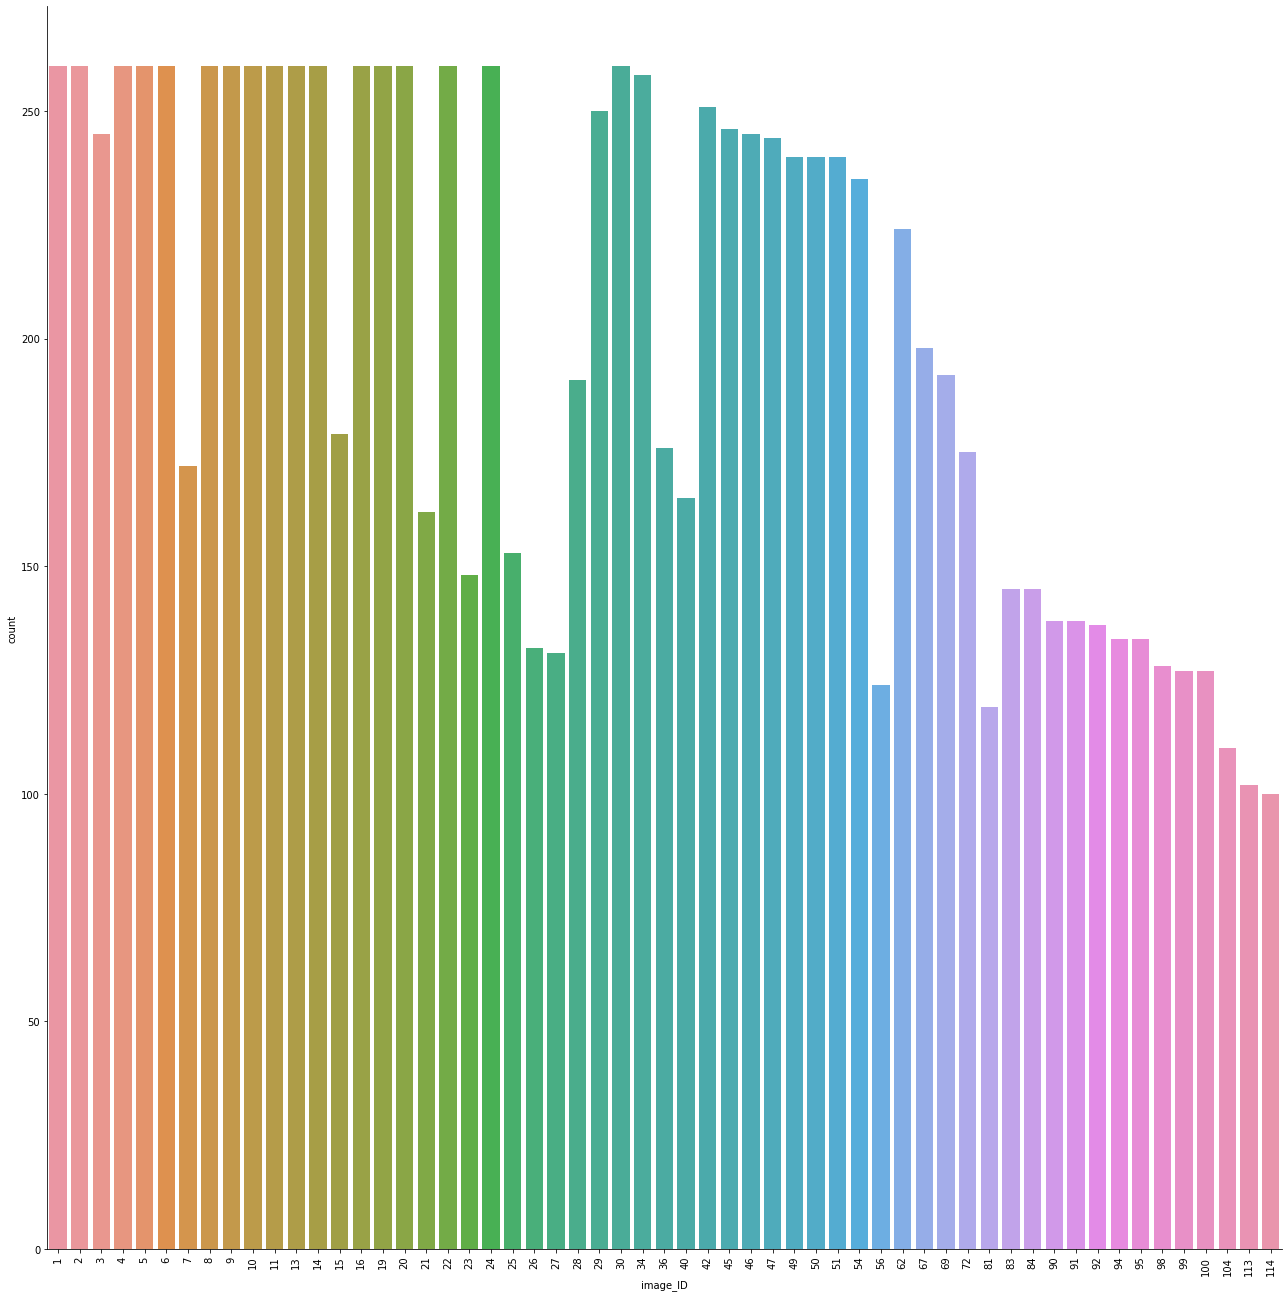

In [12]:
ax = sns.catplot(x='image_ID', data = df, kind = 'count',height=18, aspect = 1)
ax.set_xticklabels(rotation = 90)

# new dataframe with a minimum of 25 frames for the cell id's

In [13]:
unique_ID = df['image_ID'].unique()
unique_ID

# cell id's with atleast 100 frames

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  13,  14,
        15,  16,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,
        30,  34,  36,  40,  42,  45,  46,  47,  49,  50,  51,  54,  56,
        62,  67,  69,  72,  81,  83,  84,  90,  91,  92,  94,  95,  98,
        99, 100, 104, 113, 114])

In [14]:
grouped = df.groupby(df.image_ID)
len(grouped)

57

In [15]:
keys = grouped.groups.keys()

In [16]:
grouped.get_group(1)

,Folder,File,image_ID,time_ID,counts_ID,repeats
11211,3,6101_t-0_ID-1.png,1,0,260,2
11212,3,6102_t-1_ID-1.png,1,1,260,2
11213,3,6103_t-2_ID-1.png,1,2,260,2
11214,3,6104_t-3_ID-1.png,1,3,260,2
11215,3,6105_t-4_ID-1.png,1,4,260,2
...,...,...,...,...,...,...
11466,3,6356_t-255_ID-1.png,1,255,260,2
11467,3,6357_t-256_ID-1.png,1,256,260,2
11468,3,6358_t-257_ID-1.png,1,257,260,2
11469,3,6359_t-258_ID-1.png,1,258,260,2


In [17]:
len(grouped.get_group(1))

260

### Create the videos

In [18]:
data = []

def create_video(csv_number, num_frames):
    
    '''
    Function to create videos from the split cells
    
    Args:
    csv_number - the donor from which the videos will be created
    num_frames - since we want 40 frames in videos, here num_frames = 40
    
    '''
    
    print(f'Starting to create grouped dataframes for video {csv_number}')
    
    # reads csv file
    df = pd.read_csv(f'{csv_number}.csv')
    
    # sorts values based on image_ID
    df = df.sort_values('image_ID')
    
    # counts number of image belonging to an ID
    counts = df['image_ID'].value_counts()
    
    # converts to dictionary
    counts_dict = counts.to_dict()
    
    # stores count values in new coloumn - counts_ID
    df['counts_ID'] = df['image_ID'].map(counts)
    
    # updates dataframe with only image ID's with min frames => number of frames (input)
    df = df[df['counts_ID'] >= num_frames]
    
    # counts how many videos can be made for each ID given the number of frames
    df['repeats'] = df['counts_ID']/num_frames
    df['repeats'] = df['repeats'].astype(int)
    
    # sorts images and their time ID's in ascending order
    df = df.sort_values(['image_ID','time_ID'], ascending=[True,True])
    
    # finds the unique image ID labels
    unique_ID = df['image_ID'].unique()
    
    # grouping
    grouped = df.groupby(df.image_ID)
    
    print('Dataframes grouped by ID - complete')
    
    print('Video creation started')
    
    keys = grouped.groups.keys()
    
    count = 0

    for j in keys:
        
        # loop over all the cell id's with over 40 frames
        
        df_sequence = grouped.get_group(j)

        image_folder = path + str(csv_number) + '/original/'
    
        final_image_set = []
    
        for number in range(0,len(df_sequence),40):
            
            # have an overlap of 40 cells in each video created
        
            images = []
    
            for i, item in df_sequence.iloc[number:number+num_frames].iterrows():
        
                image_files = image_folder+item[1]
            
                images.append(image_files) # list all the image names that will form the video
        
            if len(images)>=num_frames:
            
                final_image_set.append(images)
        
        for z in range(len(final_image_set)):
            
            # creating the video based on the extracted image names
        
            image_list = final_image_set[z]
            len_frames = len(image_list)
    
            frame = cv.imread(image_list[0])

            height, width, layers = frame.shape

        
            id_search = re.search('_ID-(.+?).png',image_list[0]).group(1)
        
            video_name = output_path+'/'+str(csv_number)+'/'+str(csv_number)+'_'+str(id_search)+'_'+ str(j)+'_'+str(count)+'.avi'
            filename = str(csv_number)+'_'+str(id_search)+'_'+ str(j)+'_'+str(count)+'.avi'
            
            count = count + 1
        
            if height ==128 and width ==128 and len_frames>=num_frames:
            
            # creates videos of size 128*128 with frame length=40
            
                codec = cv.VideoWriter_fourcc('X', 'V', 'I', 'D')
            
                video = cv.VideoWriter(video_name, codec, 4,(128,128))
            
                for image in image_list:
                    
                    image = cv.imread(image)
                    image = cv.resize(image,(128,128))
                    video.write(image)
                
    print(f'Videos successfully created for video {csv_number}')

In [19]:
for i in folders:
    create_video(i, num_frames = 40)  

Starting to create grouped dataframes for video 1
Dataframes grouped by ID - complete
Video creation started
Videos successfully created for video 1
Starting to create grouped dataframes for video 2
Dataframes grouped by ID - complete
Video creation started
Videos successfully created for video 2
Starting to create grouped dataframes for video 3
Dataframes grouped by ID - complete
Video creation started
Videos successfully created for video 3
Starting to create grouped dataframes for video 4
Dataframes grouped by ID - complete
Video creation started
Videos successfully created for video 4
Starting to create grouped dataframes for video 5
Dataframes grouped by ID - complete
Video creation started
Videos successfully created for video 5
Starting to create grouped dataframes for video 6
Dataframes grouped by ID - complete
Video creation started
Videos successfully created for video 6
Starting to create grouped dataframes for video 13
Dataframes grouped by ID - complete
Video creation star

### Remove videos which have less than 40 frames

In [21]:
import os

path = '/asbdata/Arjun/Bloodi/Split_40_Frames/'

for i in folders:
    
    for file in sorted(os.listdir(path+'/'+str(i)+'/')):
        
        cap = cv.VideoCapture(path + str(i) + '/'+file)
        length = int(cap.get(cv.CAP_PROP_FRAME_COUNT))
        
        if length<40:
            
            os.remove(path+ str(i)+'/'+file)
            print('removed file', file)